# Interpolacja Dla zagadnienia Lagrange'a

## Generowanie wielomianów interpolacyjch oraz węzłów

### Metoda Lagrande'a

In [1]:
function CreateInterpolationLagrangePolynominal(X, Y)
    n = length(X)
    d = []
    for k in 1:n
        dₖ = 1
        for i in 1:n
            if i != k
                dₖ *= (X[k]- X[i])
            end
        end
        push!(d, dₖ)
    end
    x1 = 1
    return (x) -> sum(map((k)->Y[k]*prod([X[k] != xᵢ ? x - xᵢ : 1 for xᵢ in X])/d[k], 1:n))
end

f1 = CreateInterpolationLagrangePolynominal([1,2], [1,4])
println("f1(1)=$(f1(1)), f1(1.5)=$(f1(1.5)), f1(2)=$(f1(2))")

f1(1)=1.0, f1(1.5)=2.5, f1(2)=4.0


### Meoda Newtona

In [2]:

function CreateInterpolationNewtonPolynominal(X, Y)
    n = length(X)
    differenceQuotients = zeros(n, n)
    for i in 1:n
        differenceQuotients[1,i] = Y[i]
    end
    for i in 2:n
        for j in i:n
            differenceQuotients[i, j] = (differenceQuotients[i-1,j] - differenceQuotients[i-1,j-1]) / (X[j] - X[j-i+1])
        end
    end
    return (x) -> 
    begin
        res = differenceQuotients[1,1]
        product = (x - X[1])
        for i in 2:n
            res += product*differenceQuotients[i,i]
            product *= (x - X[i])
        end
        return res
    end
end

f2 = CreateInterpolationNewtonPolynominal([1,2,3], [1, 4, 9])
println("f2(1)=$(f2(1)), f2(1.5)=$(f2(1.5)), f2(2)=$(f2(2))")

f2(1)=1.0, f2(1.5)=2.25, f2(2)=4.0


### Generacja węzłów oraz wielomianu interpolacji

In [228]:
function getEvenSpacesAndInterpolationPolynominal(A, B, func, n, createFunc=CreateInterpolationNewtonPolynominal)
    X = range(A, stop=B, length=n)
    return X, createFunc(X, map(func, X))
end

function getCzebyszewZerosAndInterpolationPolynominal(A, B, func, n, createFunc=CreateInterpolationNewtonPolynominal)
    X = map((k)-> (B-A)/2*cos(((2*k-1)/2n*pi)) + (A + B)/2, 1:n)
    return X, createFunc(X, map(func, X))
end

getCzebyszewZerosAndInterpolationPolynominal (generic function with 2 methods)

## Rysowanie wykresów

In [227]:
using Plots

function drawInterpolation(X, func, interpolationFunc, title="" , accuracy=10e-4)
    minVal, maxVal = extrema(X)
    len = maxVal - minVal
    x = minVal:(len)*accuracy:maxVal
    plot(x, func, label="f(x)", width=1.5)
    plot!(x, interpolationFunc, label="interpolacja")
    plot!(X, map(func, X), seriestype=:scatter, label="węzły")
    title!(title)
end

function drawInterpolationN(func, nodesNumers, A, B; getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal,
     creationFunc = CreateInterpolationNewtonPolynominal,title="" , accuracy=10e-4)
    len =  B - A
    x = A:(len)*accuracy:B
    plot(x, func, label="f(x)", width=1.5)
    for n in nodesNumers
        X, interpolationFunc = getNodesFunc(A, B, func, n, creationFunc)
        plot!(x, interpolationFunc, label="interpolacja n=$n")
        plot!(X, map(func, X), seriestype=:scatter, label="węzły  n=$n")
    end
    title!(title)
end

function addInterpolationToPlot(func, n, A, B, labelInterpolation="interpolacja n=$n",labelNodes="węzły n=$n", getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal, creationFunc = CreateInterpolationNewtonPolynominal)
    X, interpolationFunc = getNodesFunc(A, B, func, n, creationFunc)
    plot!(x, interpolationFunc, label=labelInterpolation)
    plot!(X, map(func, X), seriestype=:scatter, label=labelNodes)
end

addInterpolationToPlot (generic function with 5 methods)

### Przykłady wywołania

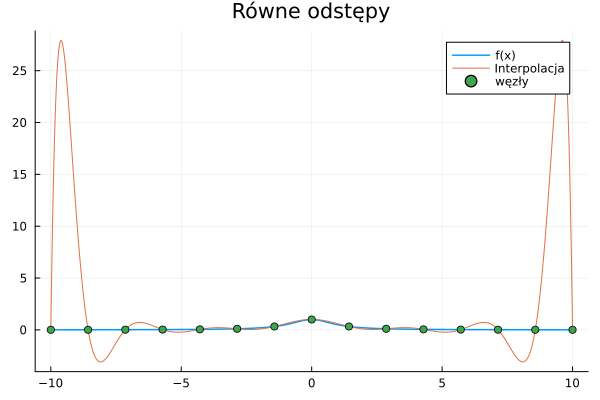

In [224]:
f = (x) -> 1/(x^2 + 1)
X, intF = getEvenSpacesAndInterpolationPolynominal(-10,10, f, 15) 
drawInterpolation(X, f, intF, "Równe odstępy")

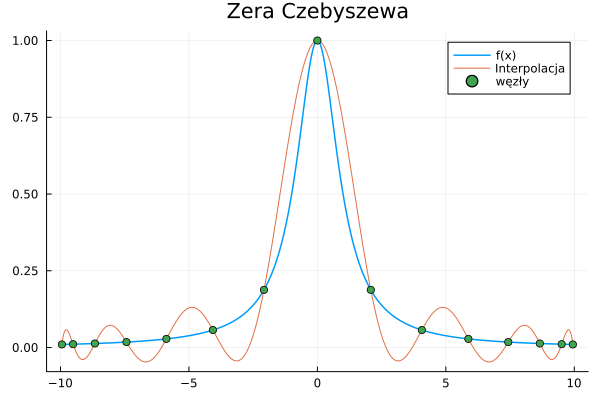

In [204]:
f = (x) -> 1/(x^2 + 1)
X, intF = getCzebyszewZerosAndInterpolationPolynominal(-10,10, f, 15) 

drawInterpolation(X, f, intF, "Zera Czebyszewa")

## Funkcja przyzielona na zajciach

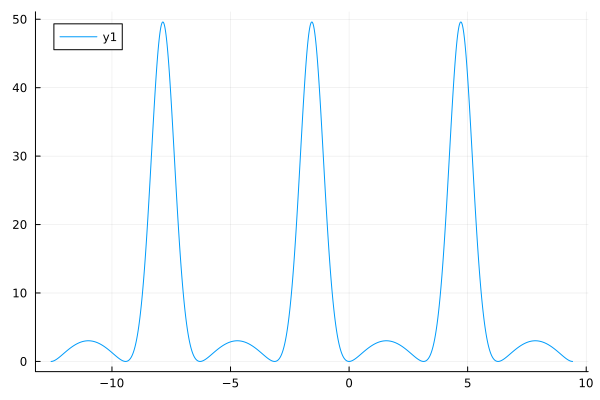

In [206]:
k = 4
m = 1
A = -4*pi
B = 3*pi
my_func = (x) -> exp(-k*sin(m*x)) + k*sin(m*x) - 1
xs = -4*pi:0.01:3*pi

plot(xs, my_func)

Sredni błąd + maksymalny 
błąd

tabele błędów


### Wykresy

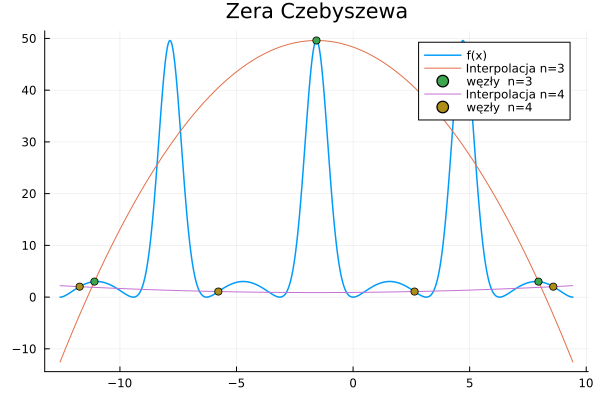

In [207]:
drawInterpolationN(my_func, [3, 4], A, B; title="Zera Czebyszewa")

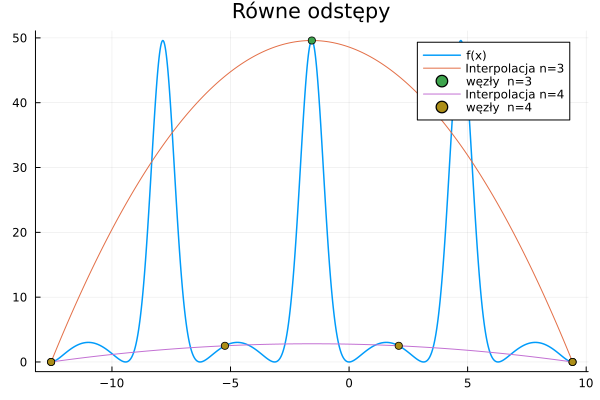

In [208]:
drawInterpolationN(my_func, [3, 4], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

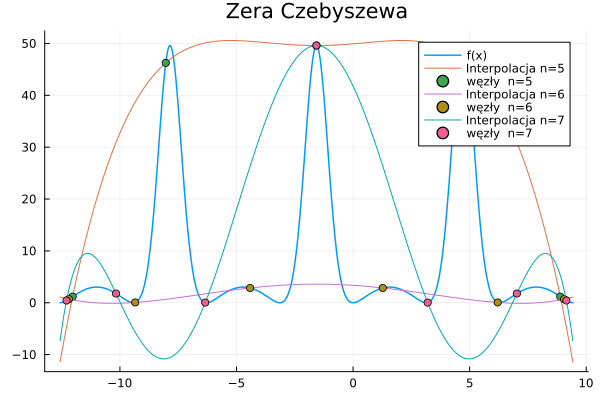

In [209]:
drawInterpolationN(my_func, [5, 6, 7], A, B; title="Zera Czebyszewa")

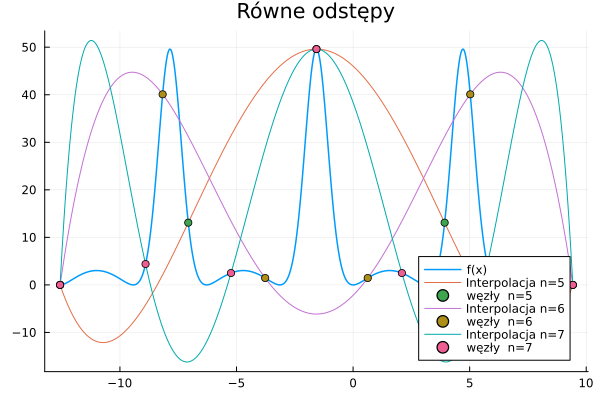

In [210]:
drawInterpolationN(my_func, [5, 6, 7], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

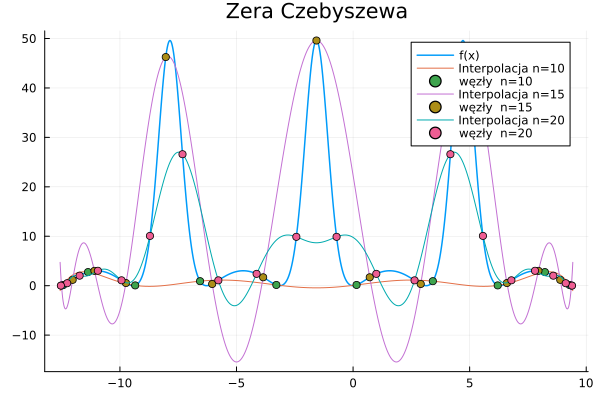

In [211]:
drawInterpolationN(my_func, [10, 15, 20], A, B, title=:"Zera Czebyszewa")

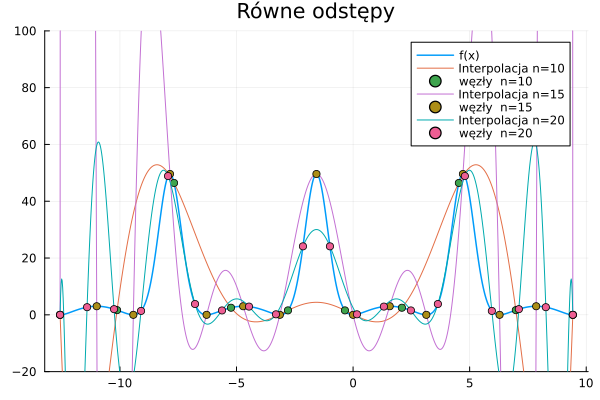

In [218]:
drawInterpolationN(my_func, [10, 15, 20], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")
ylims!((-20, 100))

### Obliczanie okładności

In [219]:
function maximalAmplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return maximum(map((x)->abs(f1(x) - f2(x)), X))
end

function RMSamplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return sqrt(sum((x)->(f1(x)- f2(x))^2,X) / length(X))
end

n = [3,4,5,6,7,8,9,10,11,12]
nothing

#### Równe odstępy

In [220]:
interpolationsEvenSpaces = [getEvenSpacesAndInterpolationPolynominal(A, B, my_func, i)[2] for i in n]
maxAes = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAes = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAes; digits=4))
println("max:", round.(rmsAes; digits=4))


n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
max:[48.6312, 47.7077, 46.4503, 55.7325, 62.4959, 49.5982, 139.6336, 84.2854, 147.5433, 43.9603]
max:[30.2718, 15.9354, 26.4835, 25.3136, 31.3631, 16.9837, 50.2781, 33.1336, 44.6118, 19.8007]


Zera Czebyszewa

In [221]:
interpolationsEvenSpaces = [getCzebyszewZerosAndInterpolationPolynominal(A, B, my_func, i)[2] for i in n]
maxAcz = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAcz = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAcz; digits=4))
println("max:", round.(rmsAcz; digits=4))

n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
max:[48.399, 48.7152, 50.1747, 48.8368, 60.1715, 64.8936, 45.5705, 50.036, 35.6949, 42.4471]
max:[28.9259, 16.3867, 35.8093, 16.1956, 25.0503, 23.7788, 20.3405, 16.9386, 16.2864, 12.9576]


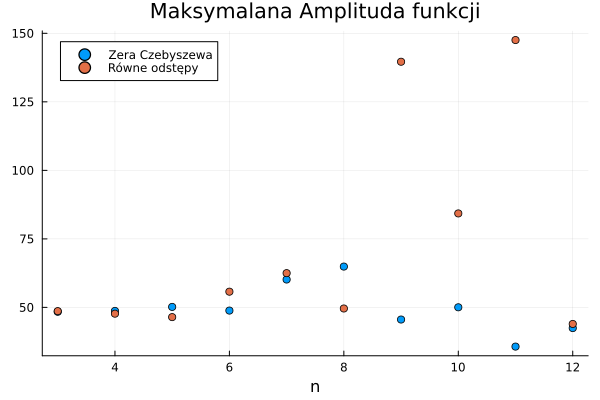

In [222]:
plot(n, [maxAcz maxAes]; seriestype=:scatter, label=["Zera Czebyszewa" "Równe odstępy"])
title!("Maksymalana Amplituda funkcji")
xlabel!("n")

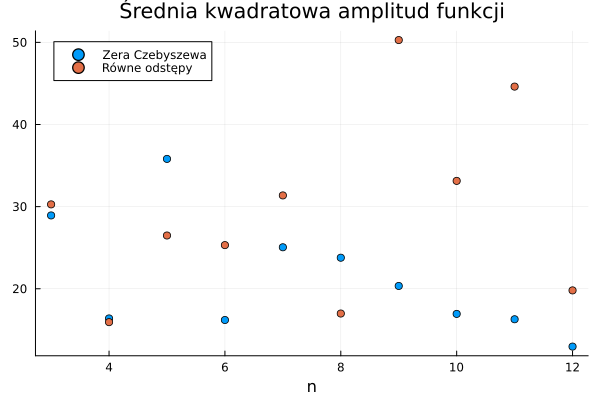

In [223]:
plot(n, [rmsAcz rmsAes]; seriestype=:scatter, label=["Zera Czebyszewa" "Równe odstępy"])
title!("Średnia kwadratowa amplitud funkcji")
xlabel!("n")

## Badanie funkcji kreujących

In [255]:
function creationFunctionMaksymalN(func, creationFunc, nodesFunc)
    n = 3
    flag=true
    while flag
        n += 1
        X, interpolationFunction = nodesFunc(A, B, func, n, creationFunc)
        for x in X
            if !(func(x) ≈ interpolationFunction(x))
                println("f(x)=$(func(x)), w(x)=$(interpolationFunction(x))")
                flag = false
                break
            end
        end
        if n == 1000
            println("more than 1000")
            return nothing
        end
    end
    println("found problem at n=$n")
    return n-1
end

creationFunctionMaksymalN (generic function with 2 methods)

#### metoda Lagrange'a

In [258]:

println("Even Spaces:")
n1 = creationFunctionMaksymalN(my_func, CreateInterpolationLagrangePolynominal, getEvenSpacesAndInterpolationPolynominal)
println("Czebyszew Zeros")
n2 = creationFunctionMaksymalN(my_func, CreateInterpolationLagrangePolynominal, getCzebyszewZerosAndInterpolationPolynominal)
# n = 359 countd after 6m 12s, czebyszew zeros
# n = 332 counted after 4m 25s, even spaces

Even Spaces:


f(x)=0.0, w(x)=NaN
found problem at n=333
Czebyszew Zeros


f(x)=0.007025386058036931, w(x)=NaN
found problem at n=360


359

#### metoda Newtona

In [259]:
println("Even Spaces:")
n1 = creationFunctionMaksymalN(my_func, CreateInterpolationNewtonPolynominal, getEvenSpacesAndInterpolationPolynominal)
println("Czebyszew Zeros")
n2 = creationFunctionMaksymalN(my_func, CreateInterpolationNewtonPolynominal, getCzebyszewZerosAndInterpolationPolynominal)

Even Spaces:
f(x)=0.0, w(x)=-1.6338945869939143e-15
found problem at n=4
Czebyszew Zeros
f(x)=0.02090510417985203, w(x)=0.020905102474697734
found problem at n=16


15